# Loan Application Status Prediction

In [31]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets




# Not to display warnings.

import warnings
warnings.filterwarnings('ignore')

### Data Input

In [32]:
# Read the given data set
data=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/loan_prediction.csv')

In [33]:
## Keeping our raw data safe in 'data' data frame. As we are now going to work with 'df'data frame.

df=data

### Data Analysis

In [34]:
# Head Checking
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
# Tail Checking
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [36]:
# Checking the Head & Tril to get an over all Idea about the data.

### First Cut Observations on the Data:

In [37]:
# Understanding the row & column numbers
df.shape

(614, 13)

In [38]:
# Analysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


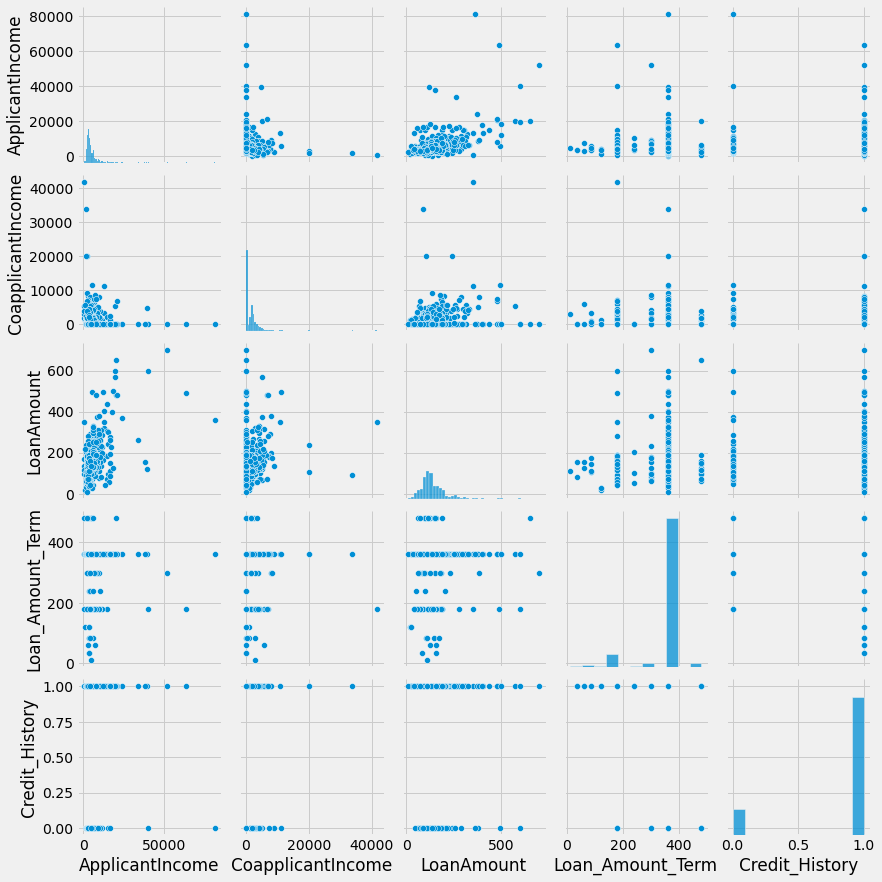

In [39]:
#pairplot
import seaborn as sns
sns.pairplot(df)

In [40]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
# checking the columns of the data
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
############ Count number of Categorical and Numerical Columns ######################
#df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print ("Categorical Columns :-")
print(categorical_columns)
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']
print ("\n")


numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print ("Numerical Columns :-")
print(numerical_columns)

Categorical Columns :-
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


Numerical Columns :-
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


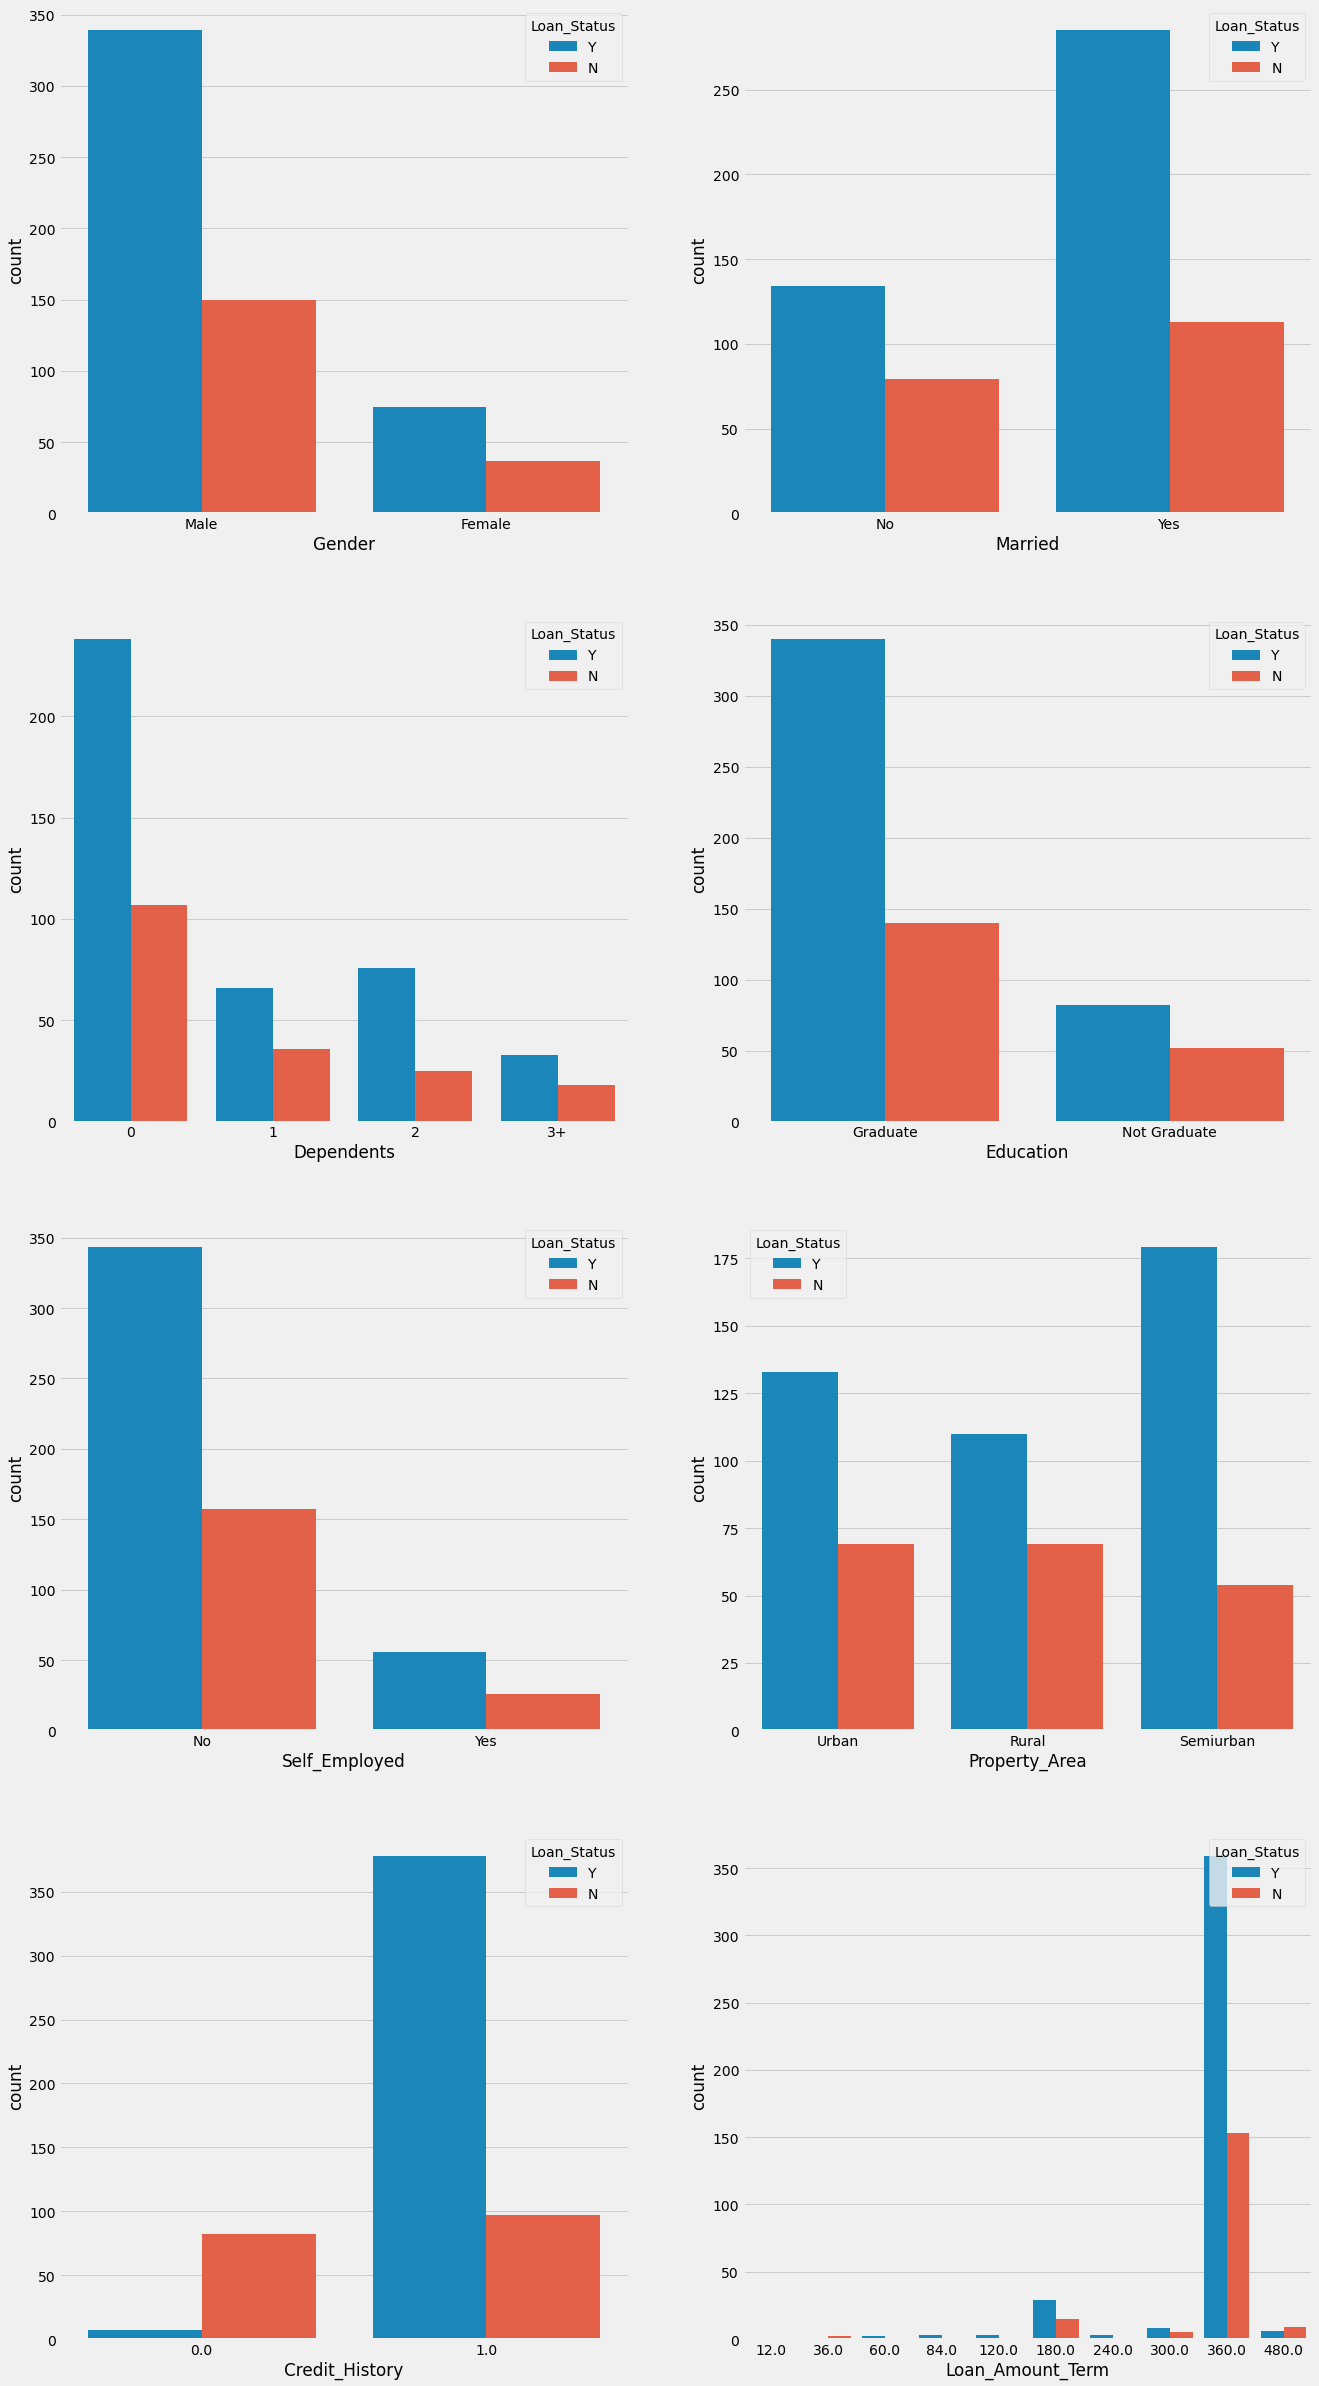

In [43]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(20,40))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=0.2)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


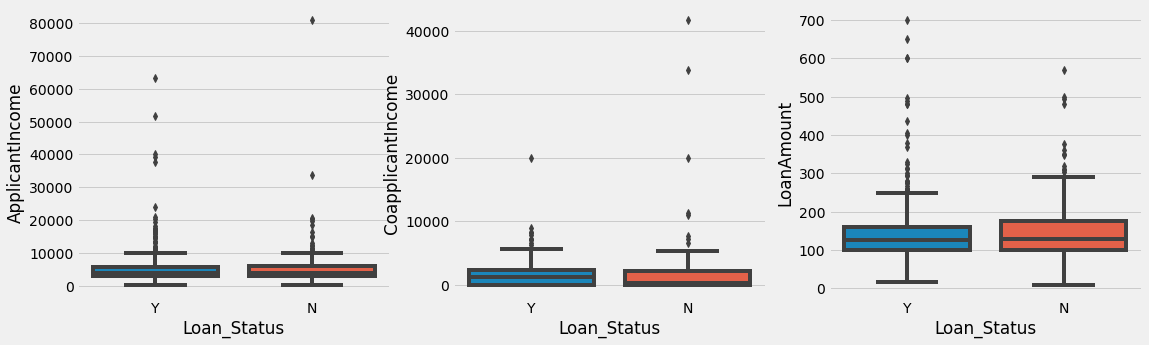

In [44]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

<AxesSubplot:>

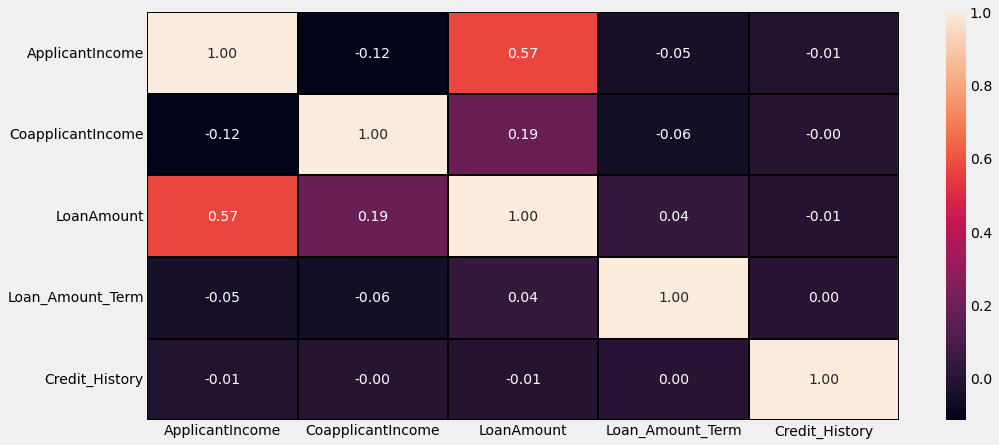

In [45]:
##  Now checking Corelation with the help og Hit Map
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt= '.2f')

In [46]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


### Observation : Not a Big Data Set to most need to take care the Data Loss Aspect.

In [17]:
#Checking for missing/null values.
df.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
##  Now checking Corelation 
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

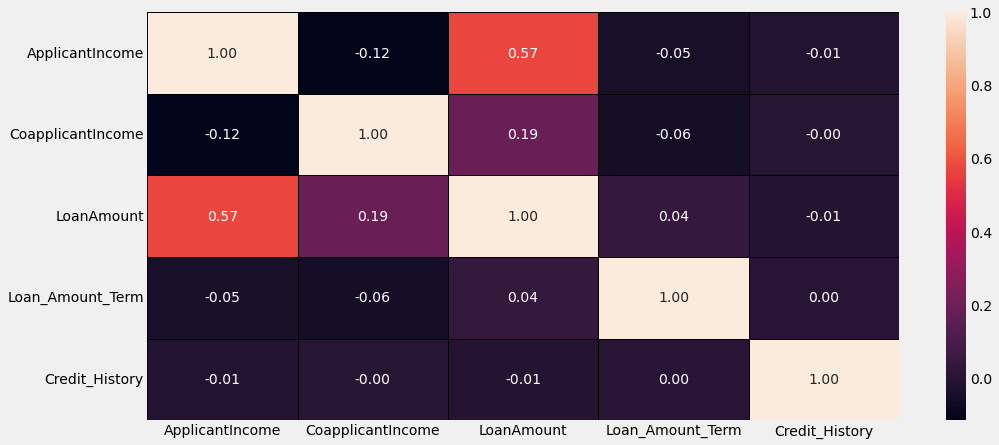

In [48]:
##  Now checking Corelation with the help og Hit Map
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.2f')

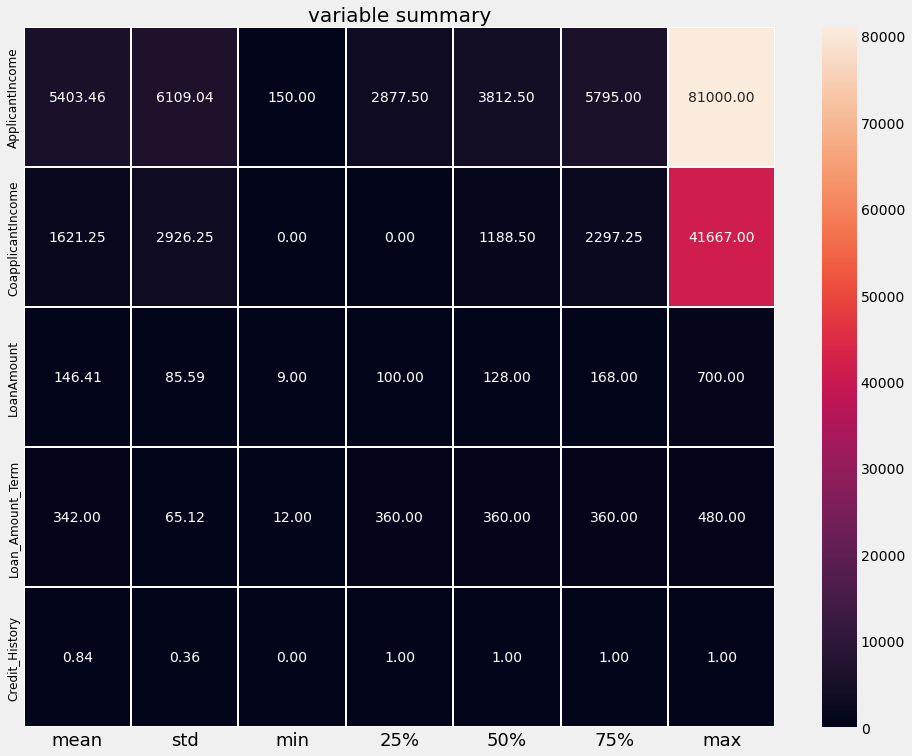

In [49]:
## Need to Check Distributions of Variables with in a hit map.
## Which will give us clear understanding about the variables.

plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

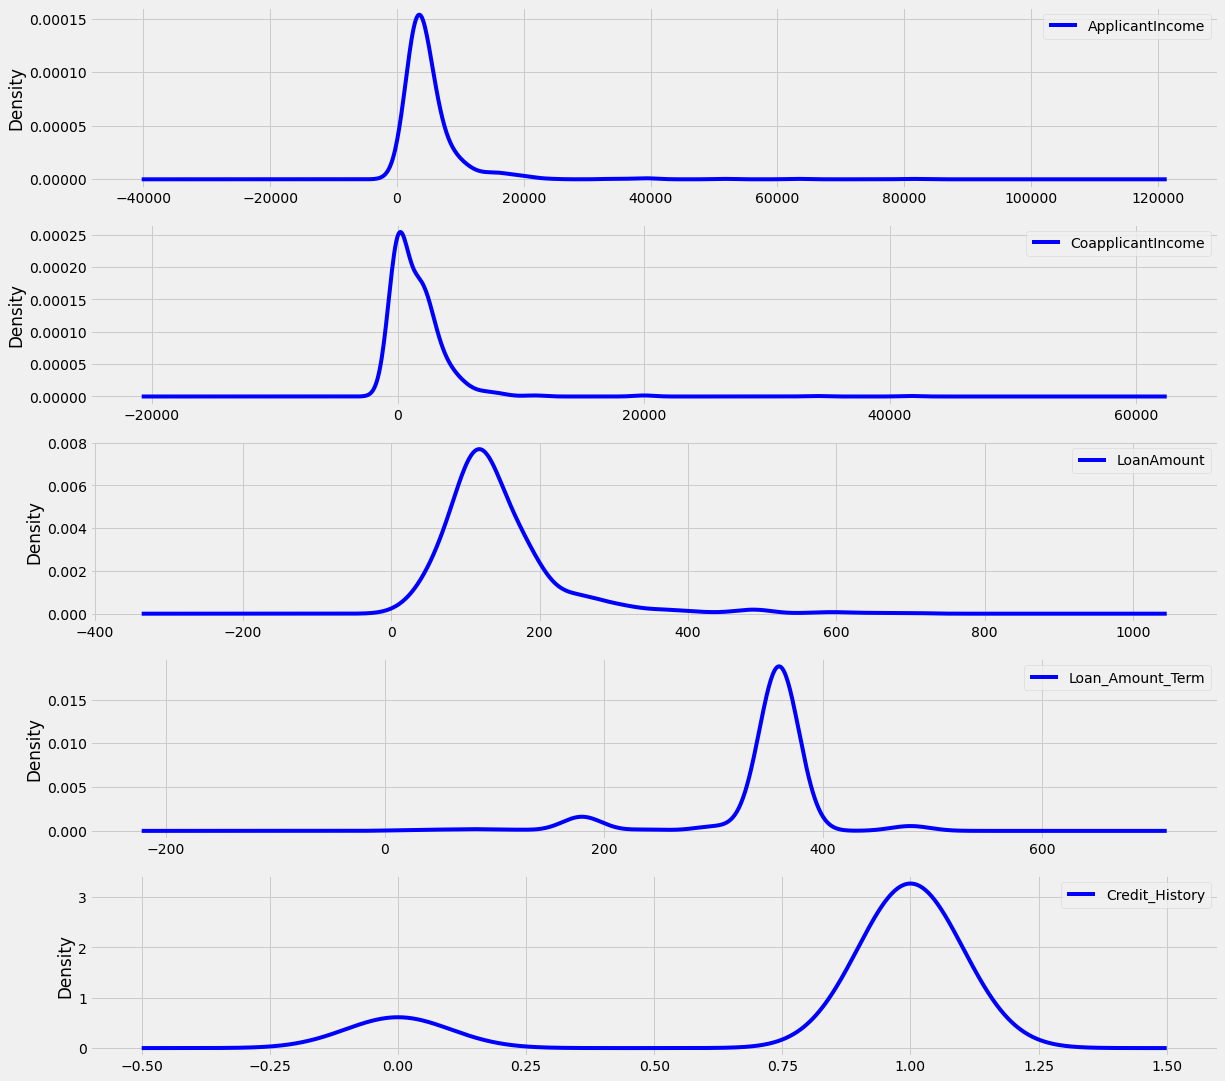

In [50]:
# Checking the distributions :

df.plot(kind ='density',subplots = True,sharex = False,figsize =(18,18),color="blue")

## Enhanced Data Analysis:

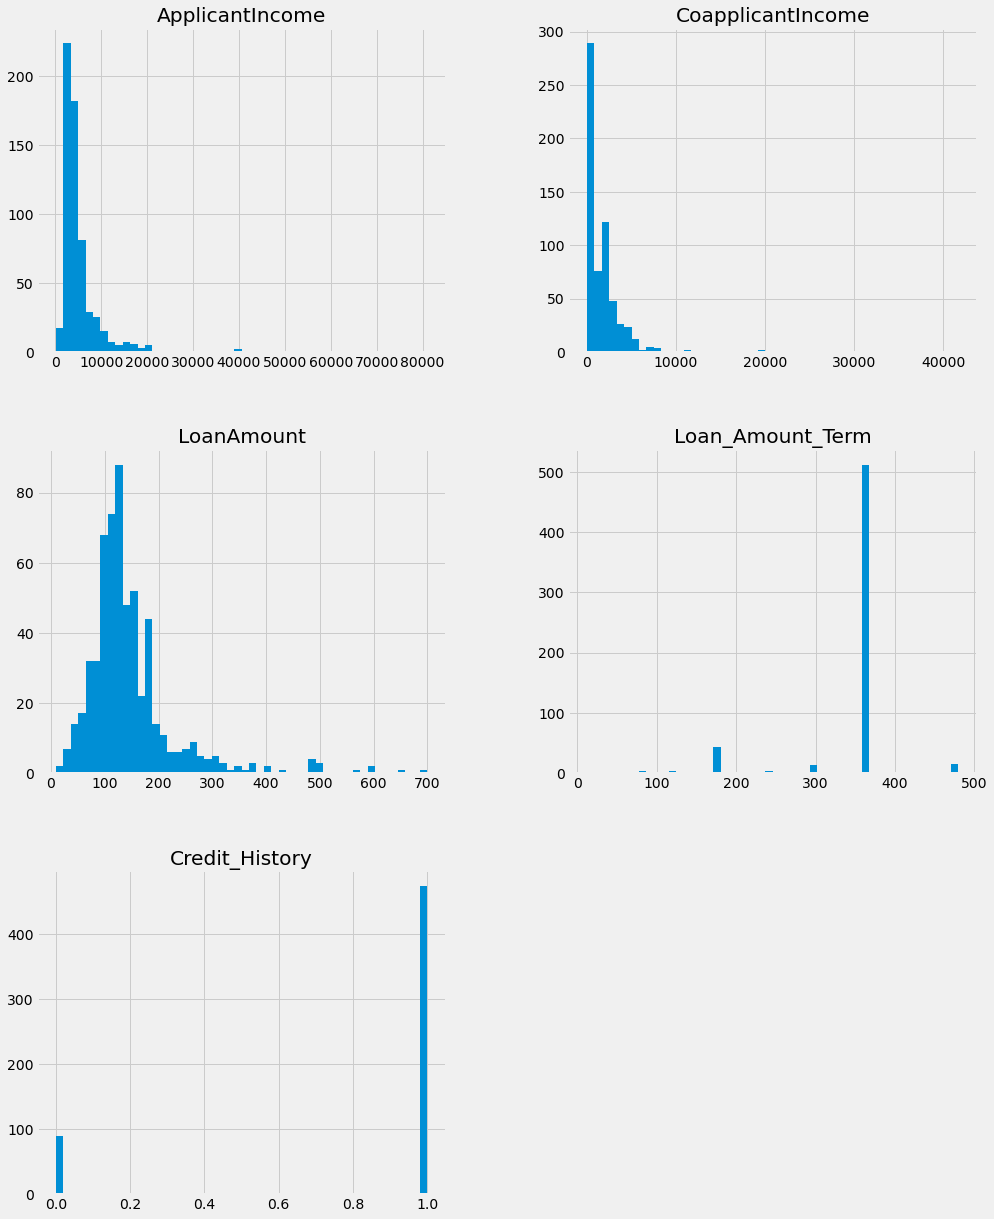

In [51]:
df.hist(figsize=(15,20),bins=50)
plt.show()

In [52]:
#Getting summary metrics for the dataframe
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [53]:
#Checking for missing/null values
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

<AxesSubplot:>

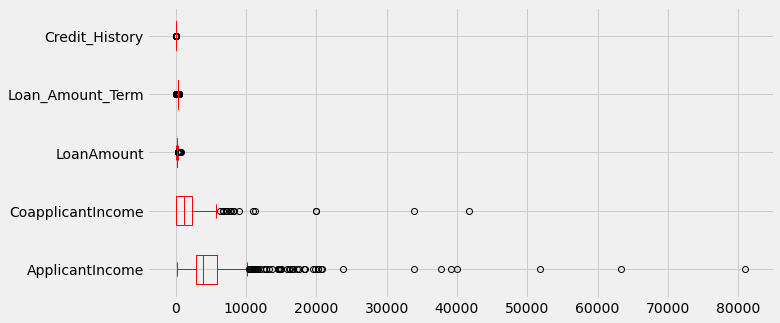

In [54]:
df.plot(kind='box',color='r',vert = False,figsize =(10,5))    #Box Plot

# Feature Selection

In [55]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
Y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify =Y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test = imp_train.transform(X_test)

In [56]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1


In [57]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

# Skewness Checking of the Data

In [58]:
X.skew(axis = 0, skipna = True)

ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.677552
Loan_Amount_Term          -2.362414
Credit_History            -1.882361
                             ...   
Dependents_3+              3.028961
Education_Not Graduate     1.367622
Self_Employed_Yes          2.159796
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Length: 627, dtype: float64

##### The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed.

# Skewness Removal

In [59]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [60]:
X

array([[ 0.5443313 , -1.10283684,         nan, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.17097382,  0.75057774, -0.02609528, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.49995512, -1.10283684, -1.31643129, ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 1.02348683,  0.20860307,  1.35564056, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.93175029, -1.10283684,  0.73596088, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.17097382, -1.10283684,  0.05016896, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [61]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8


# Splitting Dataset

In [62]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Using Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred_log = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_log))

Accuracy Score: 0.8455284552845529


In [64]:
confusion_mat_log = confusion_matrix(Y_test,Y_pred_log)
print(confusion_mat_log)

[[21 17]
 [ 2 83]]


In [65]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_log,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [66]:
fpr5,tpr5,thresholds = roc_curve(Y_test,Y_pred_log)

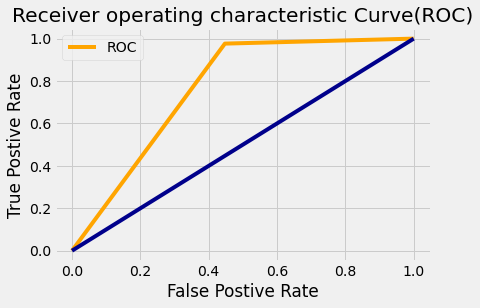

In [67]:
plt.plot(fpr5,tpr5,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using KNN:

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred_knn = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_knn))

Accuracy Score: 0.6260162601626016


In [69]:
confusion_mat_knn = confusion_matrix(Y_test,Y_pred_knn)
print(confusion_mat_knn)

[[14 24]
 [22 63]]


In [70]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_knn,digits=2))

              precision    recall  f1-score   support

           0       0.39      0.37      0.38        38
           1       0.72      0.74      0.73        85

    accuracy                           0.63       123
   macro avg       0.56      0.55      0.56       123
weighted avg       0.62      0.63      0.62       123



In [71]:
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_knn)

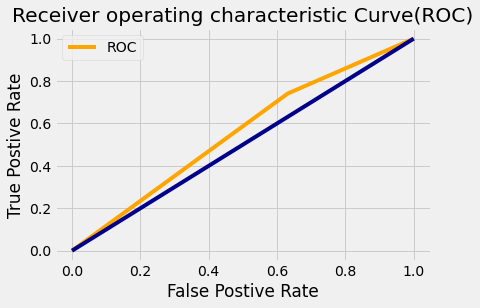

In [72]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using SVC:

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
model.fit(X_train,Y_train)
Y_pred_svc = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_svc))

Accuracy Score: 0.6910569105691057


In [74]:
confusion_mat_svc= confusion_matrix(Y_test,Y_pred_svc)
print(confusion_mat_svc)

[[ 0 38]
 [ 0 85]]


In [75]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_svc,digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



In [76]:
fpr1,tpr1,thresholds = roc_curve(Y_test,Y_pred_svc)

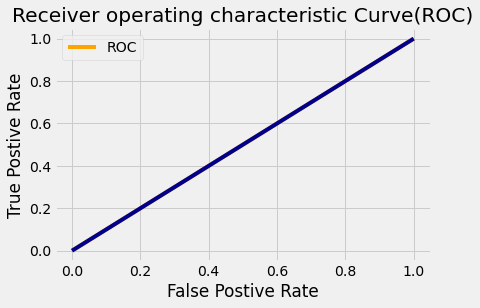

In [77]:
plt.plot(fpr1,tpr1,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using Decision Tree:

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
Y_pred_dt = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_dt))

Accuracy Score: 0.7560975609756098


In [79]:
confusion_mat_dt= confusion_matrix(Y_test,Y_pred_dt)
print(confusion_mat_dt)

[[27 11]
 [19 66]]


In [80]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_dt,digits=2))

              precision    recall  f1-score   support

           0       0.59      0.71      0.64        38
           1       0.86      0.78      0.81        85

    accuracy                           0.76       123
   macro avg       0.72      0.74      0.73       123
weighted avg       0.77      0.76      0.76       123



In [81]:
fpr2,tpr2,thresholds = roc_curve(Y_test,Y_pred_dt)

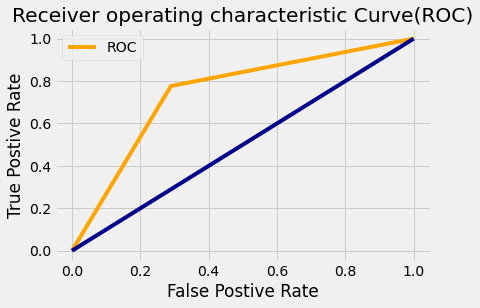

In [82]:
plt.plot(fpr2,tpr2,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using GaussianNB:

In [95]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.model__var_smoothing=[1e-09]
model3.fit(X_train,Y_train)
Y_pred_gnb = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_gnb))

Accuracy Score: 0.8455284552845529


In [96]:
confusion_mat_gnb= confusion_matrix(Y_test,Y_pred_gnb)
print(confusion_mat_gnb)

[[22 16]
 [ 3 82]]


In [97]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_gnb,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



In [98]:
fpr3,tpr3,thresholds = roc_curve(Y_test,Y_pred_gnb)

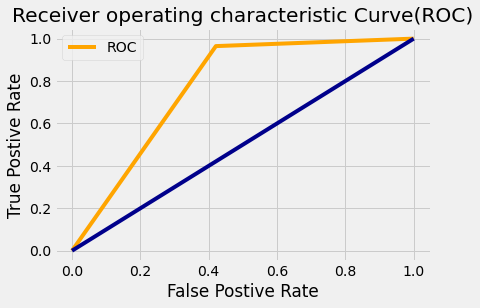

In [99]:
plt.plot(fpr3,tpr3,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit


pca = PCA()
model = GaussianNB()
steps = [('pca', pca), ('model', model)]
pipeline = Pipeline(steps)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# get the default parameters of your model and use them as a param_grid
modelwithpca = GridSearchCV(pipeline, param_grid={'model__' + k: [v] for k, v in model.get_params().items()}, cv=cv)

# will run 5 times as your cv is configured
modelwithpca.fit(X_test,Y_test)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', GaussianNB())]),
             param_grid={'model__priors': [None],
                         'model__var_smoothing': [1e-09]})

In [101]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.model__var_smoothing=[1e-09]
model3.fit(X_train,Y_train)
Y_pred_gnb = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_gnb))

Accuracy Score: 0.8455284552845529


# Using Random Forest:

In [102]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred_rf = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_rf))

Accuracy Score: 0.8536585365853658


In [103]:
confusion_mat_rf= confusion_matrix(Y_test,Y_pred_rf)
print(confusion_mat_rf)

[[21 17]
 [ 1 84]]


In [104]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_rf,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [105]:
fpr4,tpr4,thresholds = roc_curve(Y_test,Y_pred_rf)

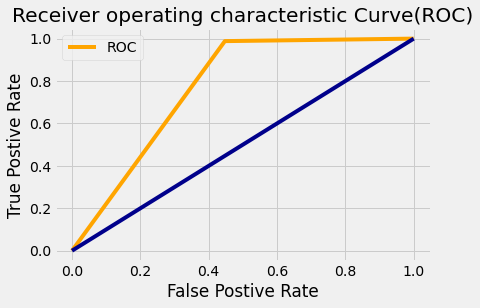

In [106]:
plt.plot(fpr4,tpr4,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

In [107]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')


rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_test, Y_test)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 12, 'max_features': 11}
0.7564102564102564


In [108]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1,max_depth=13,max_features=3)
model2.fit(X_train, Y_train)
Y_pred_rf1 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_rf))

Accuracy Score: 0.8536585365853658


# So Random Forest is the Best

# Cross Validation Score

In [111]:
pred_log_reg=model2.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(Y_test,Y_pred_rf)
for j in range(2,10):
    lsscore=cross_val_score(model2,X_test,Y_test,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")
    

At cv:- 2
Cross Validation Score is:- 73.98202009518772
accuracy_score is:- 85.36585365853658


At cv:- 3
Cross Validation Score is:- 70.73170731707317
accuracy_score is:- 85.36585365853658


At cv:- 4
Cross Validation Score is:- 71.53225806451613
accuracy_score is:- 85.36585365853658


At cv:- 5
Cross Validation Score is:- 69.93333333333334
accuracy_score is:- 85.36585365853658


At cv:- 6
Cross Validation Score is:- 71.50793650793652
accuracy_score is:- 85.36585365853658


At cv:- 7
Cross Validation Score is:- 70.72829131652661
accuracy_score is:- 85.36585365853658


At cv:- 8
Cross Validation Score is:- 70.72916666666667
accuracy_score is:- 85.36585365853658


At cv:- 9
Cross Validation Score is:- 69.1086691086691
accuracy_score is:- 85.36585365853658




# Model Saving

In [113]:
import pickle
filename= 'Loan Application Status Prediction.pkl'
pickle.dump(model2,open (filename,'wb'))